<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas/blob/main/Machine%20Learning/Aprendizaje%20Supervisado/Support_Vector_Machines_(Lineales_y_no_Lineales).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

**Clasificación lineal y función de decisión**

Los modelos lineales de clasificación utilizan una función lineal para asignar una clase a cada observación. Dada una observación con características $x=(x_1,x_2,...,x_n)$, el clasificador calcula:

$$f(x)= w^Tx+b$$

donde:
- $w$ es el vector de pesos
- $b$ es el termino del sesgo

La predicción de clase se obtiene usando la función signo:

$$
\hat{y} =
\begin{cases}
+1, & \text{si } f(x) \ge 0 \\
-1, & \text{si } f(x) < 0
\end{cases}
$$

Esto define un límite de decisión lineal, que en dos dimensiones corresponde a una recta.

**Margen y clasificación óptima**

No todos los clasificadores lineales son igual de buenos, un criterio clave para evaluar un clasificador es el margen, definido como la distancia entre el límite de decisión y los puntos de entrenamiento más cercanos.

- Margen pequeño → modelo sensible al ruido

- Margen grande → mejor separación entre clases

La idea central de las Support Vector Machines (SVM) es encontrar el clasificador lineal que maximiza el margen entre las dos clases, este clasificador se conoce como Linear Support Vector Machine (LSVM).

**Linear Support Vector Machine (SVC con kernel lineal)**

Una SVM lineal busca el hiperplano:

$$w^Tx+b=0$$

que maximiza el margen sujeto a posibles errores de clasificación.


In [2]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression
%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import neighbors
import numpy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression


In [5]:
#@title Grafico

def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


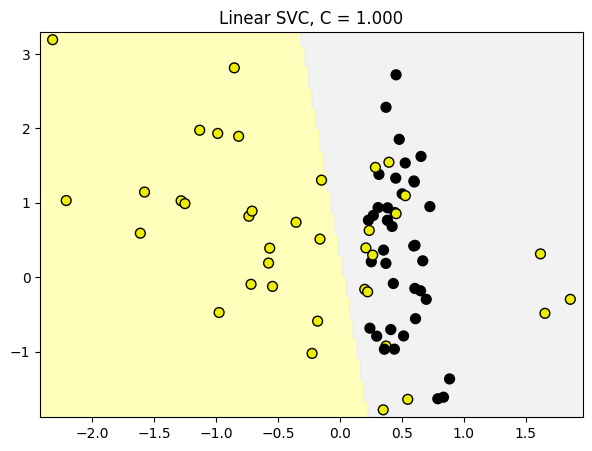

In [6]:
from sklearn.svm import SVC

from sklearn.datasets import make_classification

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

**Interpretación:**

- El límite de decisión es lineal

- Solo algunos puntos influyen directamente en la frontera: los vectores de soporte

- El modelo busca separar las clases con el mayor margen posible

**Parámetro de regularización C en SVM**

El parámetro C controla el equilibrio entre maximizar el margen y minimizar errores de clasificación

Conceptualmente:

C grande → poca regularización

C pequeño → mucha regularización

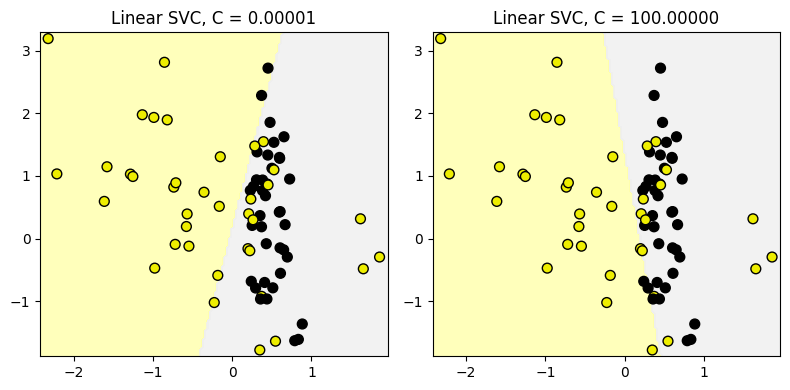

In [7]:
from sklearn.svm import LinearSVC
#from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

**Interpretación**

C pequeño: Margen grande, más errores permitidos, modelo más robusto

C grande: Margen pequeño, ajuste fuerte a los datos, mayor riesgo de sobreajuste

**Aplicación de Linear SVM a un dataset real**

Las SVM lineales funcionan bien en problemas reales, especialmente en datasets de alta dimensión.

Interpretación: Alta precisión en entrenamiento y prueba, buena capacidad de generalización, entrenamiento y predicción eficientes

In [9]:
from sklearn.svm import LinearSVC

# Breast cancer dataset for classification
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.97
Accuracy of Linear SVC classifier on test set: 0.97


# Clasificación multiclase con modelos lineales

**Problemas de clasificación multiclase**

En muchos problemas reales, la variable objetivo tiene más de dos clases.
Por ejemplo, el dataset de frutas contiene cuatro categorías distintas, los modelos lineales pueden manejar este caso usando la estrategia one-vs-rest (OvR). <br><br>

**Estrategia One-vs-Rest (OvR)**

Para un problema con 𝑀 clases:

- Se entrenan 𝑀 clasificadores binarios

- Cada clasificador separa una clase contra todas las demás

Durante la predicción:

- Cada clasificador produce una puntuación

- Se asigna la clase con la puntuación más alta

**LinearSVC para clasificación multiclase**

In [20]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load the fruit data
fruits = pd.read_table('/content/fruit_data_with_colors.txt')

# Prepare the X and y for the binary classification problem (using only height and width)
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else

In [22]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.28181481  0.64252348]
 [-1.64038561  1.15840762]
 [-0.01104849  0.33191664]
 [ 1.24080171 -1.73050751]]
Intercepts:
 [-2.71436601  1.21194958 -2.745555    1.68001664]


**Interpretación**

- clf.coef_ tiene una fila por clase

- Cada fila define un clasificador clase vs resto

- clf.intercept_ contiene un intercepto por clase

**Visualización de los límites de decisión multiclase**

Cada clasificador lineal define una recta:

$$w_0x_0+w_1x_1+b=0$$

Despejando $x_1$:

$$x_1 = - \frac{w_0x_0+b}{w_1}$$

In [ ]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b,
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)

# Define target_names_fruits
target_names_fruits = fruits['fruit_name'].unique().tolist()
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

**Interpretación**

- Cada línea corresponde a una clase

- Cada clasificador separa su clase del resto

- La predicción final se obtiene comparando puntuaciones

**Conclusiones generales**

- Las SVM lineales buscan maximizar el margen
- Son robustas, rápidas y escalables

- Funcionan bien en datasets de alta dimensión

- La clasificación multiclase se maneja mediante one-vs-rest

- Los coeficientes permiten inspeccionar qué está aprendiendo el modelo

# Kernelized Support Vector Machines (SVM no lineales)

**¿Por qué SVM kernelizadas?**

Las SVM lineales funcionan bien cuando las clases son linealmente separables, pero muchos datasets reales no cumplen esto.
Las SVM kernelizadas permiten aprender fronteras de decisión no lineales sin construir explícitamente nuevas variables.

La idea clave es transformar implícitamente los datos a un espacio de mayor dimensión, donde un clasificador lineal sí puede separar las clases, esto se conoce como el truco del kernel. Una SVM busca una frontera del tipo:

$$f(x) = w^T𝜙(x)+b$$

Donde:

$𝜙(x)$ es una transformación no lineal

El kernel evita calcular $𝜙(x)$ explícitamente usando:

$$K(x_i,x_j) = <𝜙(x_i),𝜙(x_j)>$$

**Kernel RBF (Radial Basis Function)**

El kernel RBF mide similitud basada en distancia:

$$K(x_i,x_j) = e^{(-γ||x_i-x_j||^2)}$$

- gamma pequeño → influencia amplia → fronteras suaves

- gamma grande → influencia local → fronteras complejas (riesgo de overfitting)

In [10]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()


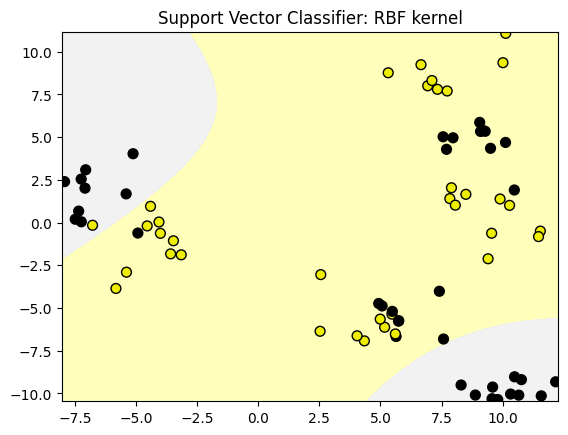

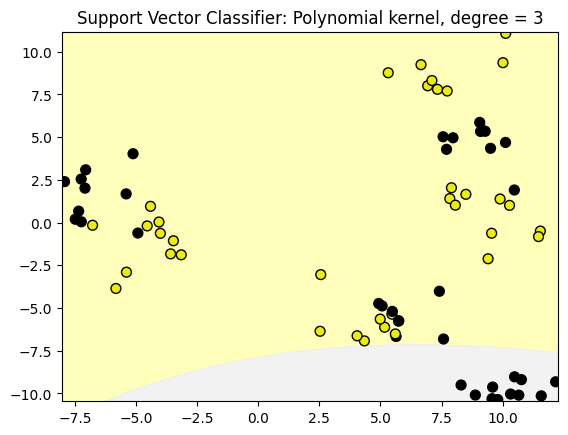

In [13]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train), X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

**Interpretación**

- El kernel RBF genera fronteras suaves y cerradas

- El kernel polinomial introduce interacciones polinomiales entre variables

- Ambos permiten separar datos no lineales, a diferencia de SVM lineales

**Efecto del parámetro gamma en RBF**

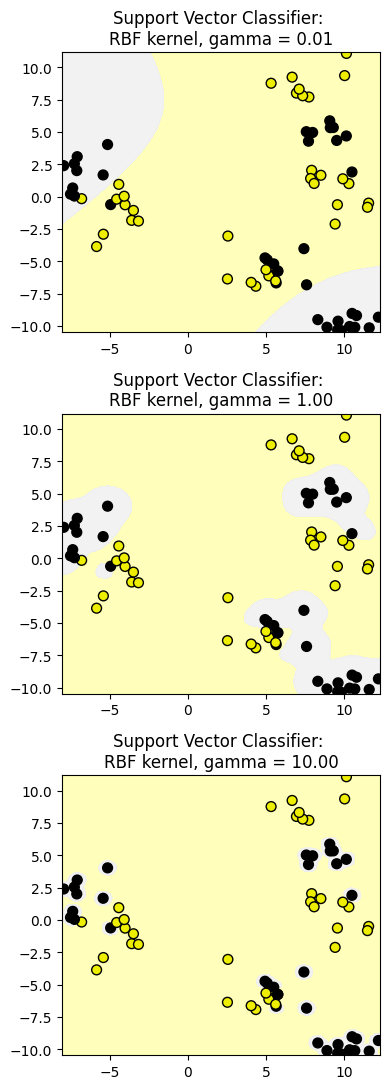

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

**Interpretación**

Gamma Pequeño	-> Fronteras amplias y suaves

Gamma Medio	-> Buen balance

Gamma Grande -> Fronteras muy ajustadas (overfitting)

- C controla la regularización

- gamma controla la complejidad geométrica

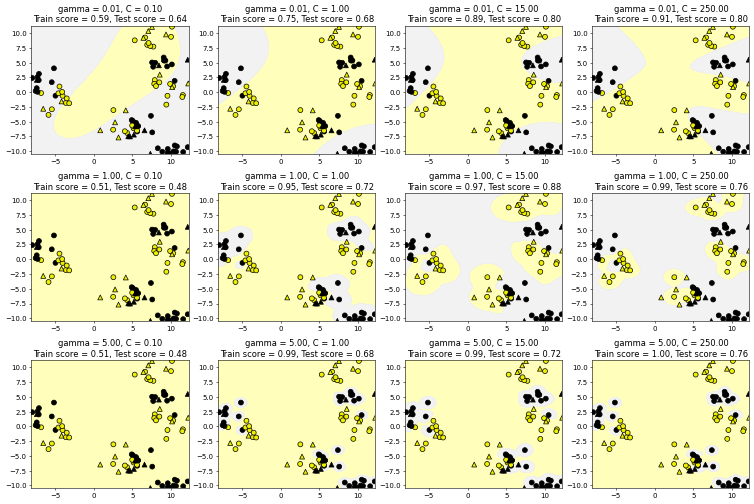

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):

    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

**Regla general**

gamma grande + C grande → modelo muy flexible

gamma pequeño + C pequeño → modelo rígido

**Aplicación a datos reales: importancia de la normalización**

Sin normalizar

In [16]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=60).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.93
Accuracy of RBF-kernel SVC on test set: 0.94


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=60).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 1.00
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.97


Las SVM kernelizadas requieren normalización para funcionar correctamente.